# Predicting Avocado prices using Facebook Prophet 

## Overview

I am forecasting avocado prices using Facebook’s Prophet model. Prophet is an open-source forecasting tool developed by Facebook’s Core Data Science team. It is designed to handle time series data with strong seasonal effects and multiple seasons of historical data. Prophet uses an additive model to fit non-linear trends and incorporates yearly, weekly, and daily seasonality, along with the ability to account for holiday effects. More information is here: https://facebook.github.io/prophet/docs/quick_start.html#python-api.

The dataset for this project is sourced from Kagg lehttps://www.kaggle.com/datasets/neuromusic/avocado-prices?resource=download This dataset exclusively contains avocado prices sourced from various regions across the United States.


## Problem Statement


### Dataset Overview

The dataset contains weekly retail scan data from 2018, capturing both the retail volume (units) and price of Hass avocados. Retail scan data is collected directly from retailers’ cash registers, reflecting actual sales. The Average Price represents the cost per avocado, regardless of whether they are sold individually or in bags.

#### Key details about the dataset:

- **Date**: The date of the observation
- **AveragePrice**: The average price of a single avocado
- **Type**: Conventional or organic
- **Year**: The year of the observation
- **Region**: The city or region of the observation
- **Total Volume**: Total number of avocados sold
- **4046**: Total number of avocados with PLU 4046 sold
- **4225**: Total number of avocados with PLU 4225 sold
- **4770**: Total number of avocados with PLU 4770 sold

**Note**: The dataset only includes Hass avocados; other varieties, such as greenskins, are not represented.

### PLU (Price Look-Up Code)

- PLU stands for Price Look-Up code, a system used by grocery stores and markets to identify produce items.
- Each code is a four- or five-digit number assigned to a specific type of fruit or vegetable, facilitating efficient checkout processes and inventory management.
- In this dataset, the PLU codes correspond to different types of avocados sold:
  - **PLU 4046**: Represents a specific type of avocado known as the Hass avocado, typically sold individually.
  - **PLU 4225**: Indicates the sale of organic Hass avocados, which are grown without synthetic pesticides or fertilizers.
  - **PLU 4770**: Refers to the sale of large Hass avocados, often sold individually or in bulk.

By analyzing the sales data for these PLU codes, we can gain insights into consumer preferences and trends within the avocado market in the United States.

Let's start!


## Step-by-Step Walkthrough


### 1. Import Libraries


First it is necessary to import essential libraries: pandas and numpy for data manipulation, matplotlib and seaborn for visualizations, and Prophet for time series forecasting.

In [1]:
# import libraries 
import pandas as pd #for data manipulation using dataframes
import numpy as np #for data statistical analysis 
import matplotlib.pyplot as plt #for data visualisation
import random
import seaborn as sns
from prophet import Prophet

### 2. Load the Data

Let's load the avocado dataset into a DataFrame, which will contain historical data such as dates, prices, and volumes. The .head() function shows the first few rows for a quick look at the structure.

In [2]:
# dataframe creation for the dataset 
avocado_df = pd.read_csv('avocado.csv')

# Let's view the head of the training dataset
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Let's view the last elements in the training dataset
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


### 3. Sort by Date

Time series data should always be in chronological order. Here, I sort the data by the 'Date' column to ensure that the subsequent analysis and forecasting happen correctly:

In [4]:
# Sort the DataFrame by the 'Date' column in ascending order to ensure chronological sequence
avocado_df = avocado_df.sort_values("Date")

In [5]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


### 4. Plot Historical Prices


Let's visualize the historical avocado prices over time to observe any visible trends or seasonal patterns. The plot should reveal price fluctuations over time, possibly indicating seasonal trends. Peaks and valleys might align with certain times of the year, reflecting demand changes. 

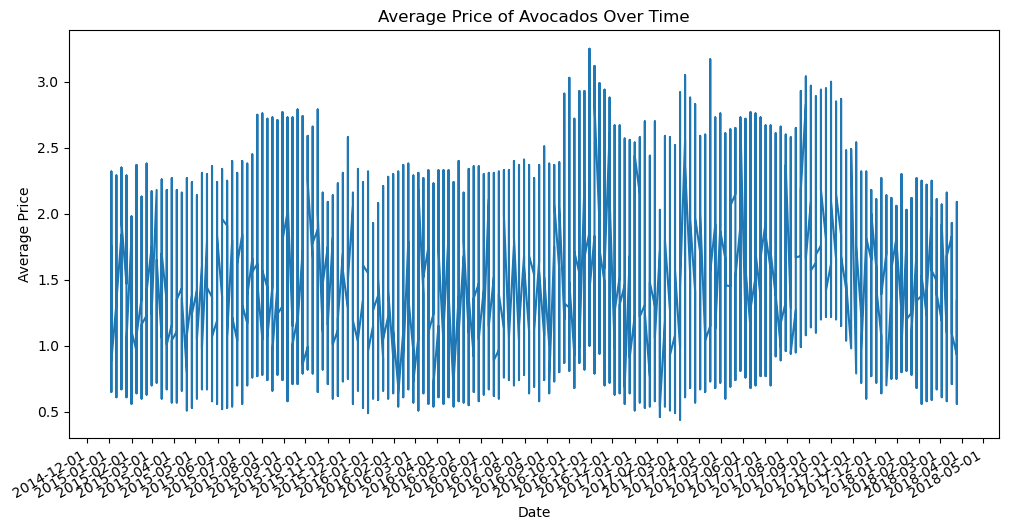

In [6]:
import matplotlib.dates as mdates

# Convert 'Date' column to datetime
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

plt.figure(figsize=(12,6))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

# Set the date format on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  


# Rotate and format the x-axis labels
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados Over Time')

# Show the plot
plt.show()


From 2015 to 2018, avocado prices exhibited distinct seasonal trends. In 2015, prices peaked during the middle of summer, extending from July through October, and then declined towards the end of the year. In 2016, the peak occurred later, starting in September and lasting until November, with a subsequent price drop by January. The year 2017 was marked by two peak periods, one in early spring (March to April) and another in the fall (September to November). After November 2017, a downward trend set in, with prices reaching a notable low in March 2018. Overall, these trends suggest that avocado prices typically rise during the latter half of each year, peaking in late summer or fall, before falling to their lowest levels early in the following year.
The limited 2018 data makes it hard to draw firm conclusions, but tracking trends beyond May will provide a clearer picture.

Let's determine, if there's a relationship between the avocado prices and the quantity demanded.

Correlation between Price and Demand: -0.19275238715271914


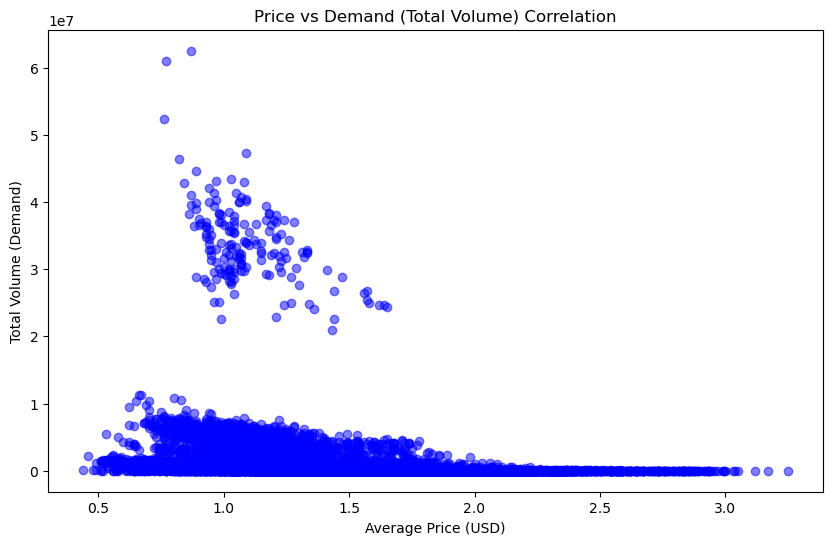

In [23]:
price_demand_correlation = avocado_df['AveragePrice'].corr(avocado_df['Total Volume'])

print(f'Correlation between Price and Demand: {price_demand_correlation}')

# Scatter plot of price vs. demand
plt.figure(figsize=(10, 6))
plt.scatter(avocado_df['AveragePrice'], avocado_df['Total Volume'], alpha=0.5, color='blue')
plt.title('Price vs Demand (Total Volume) Correlation')
plt.xlabel('Average Price (USD)')
plt.ylabel('Total Volume (Demand)')
plt.show()

A correlation of -0.19 suggests a slight inverse relationship between price and demand, meaning that as prices increase, demand tends to decrease, but the relationship is not very strong.

In typical economic theory, higher prices tend to lower demand (and vice versa), but in our dataset, the impact of price on demand is minimal. This could mean:

Demand for avocados is relatively inelastic, meaning that changes in price do not significantly affect the quantity purchased. This could be due to factors like consumer preference or the availability of alternatives.
There may be other factors influencing demand (such as seasonality, weather, or supply issues) that aren't captured in the price alone.

Let's plot demand curve and the price curve across different seasons.

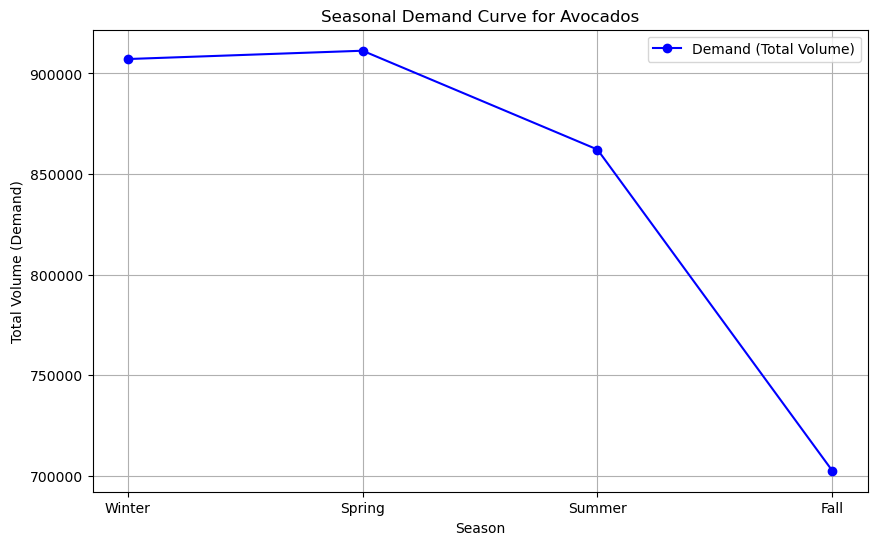

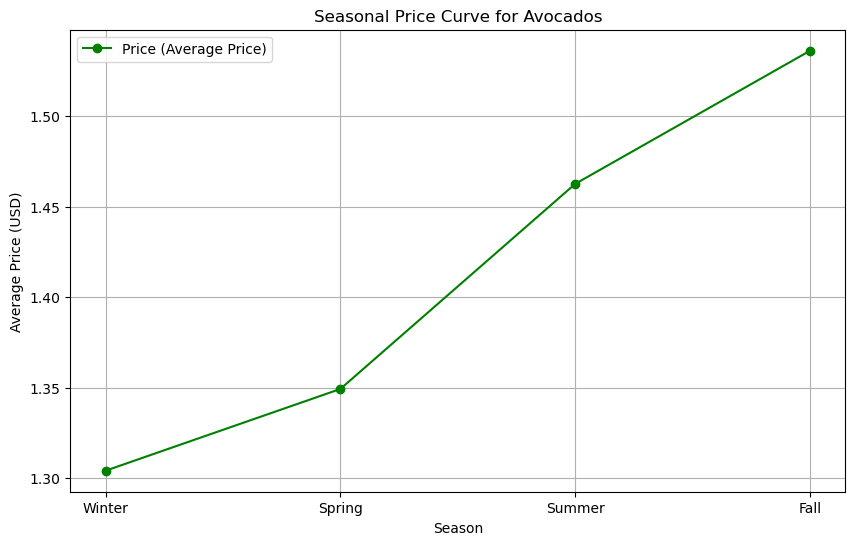

In [24]:
# Ensure the dataset has 'Date' (or 'ds'), 'AveragePrice', and 'Total Volume'
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])  # Convert date to datetime
avocado_df['Month'] = avocado_df['Date'].dt.month

# Define seasons based on months
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

avocado_df['Season'] = avocado_df['Month'].apply(get_season)

# Group by season and calculate the mean demand (Total Volume) and mean price (Average Price)
seasonal_demand = avocado_df.groupby('Season')['Total Volume'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
seasonal_price = avocado_df.groupby('Season')['AveragePrice'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plot the seasonal demand curve
plt.figure(figsize=(10, 6))
plt.plot(seasonal_demand.index, seasonal_demand.values, marker='o', color='blue', label='Demand (Total Volume)')
plt.title('Seasonal Demand Curve for Avocados')
plt.xlabel('Season')
plt.ylabel('Total Volume (Demand)')
plt.grid(True)
plt.legend()
plt.show()

# Plot the seasonal price curve
plt.figure(figsize=(10, 6))
plt.plot(seasonal_price.index, seasonal_price.values, marker='o', color='green', label='Price (Average Price)')
plt.title('Seasonal Price Curve for Avocados')
plt.xlabel('Season')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

The seasonal analysis reveals stable avocado demand during Winter and Spring, with a notable decline in Summer and Fall, while prices consistently increase across all seasons. This suggests that, despite lower demand in the latter months, factors like supply constraints and consumer willingness to pay are driving prices upward. The dynamics indicate that consumers may prioritize avocado purchases based on preferences and availability, highlighting the complexity of the avocado market. Understanding these trends is essential for producers and retailers to adapt their strategies effectively.

Now it is time to explore how avocado sales are distributed across different regions. Below is the code that excludes the 'TotalUS' region, calculates the total volume of avocados sold by region, and plots this data:

C:\Users\matroskin\AppData\Local\Temp\ipykernel_24788\83695839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='Total Volume', data=region_volume, order=region_volume.sort_values('Total Volume', ascending=False)['region'], palette='Set2')


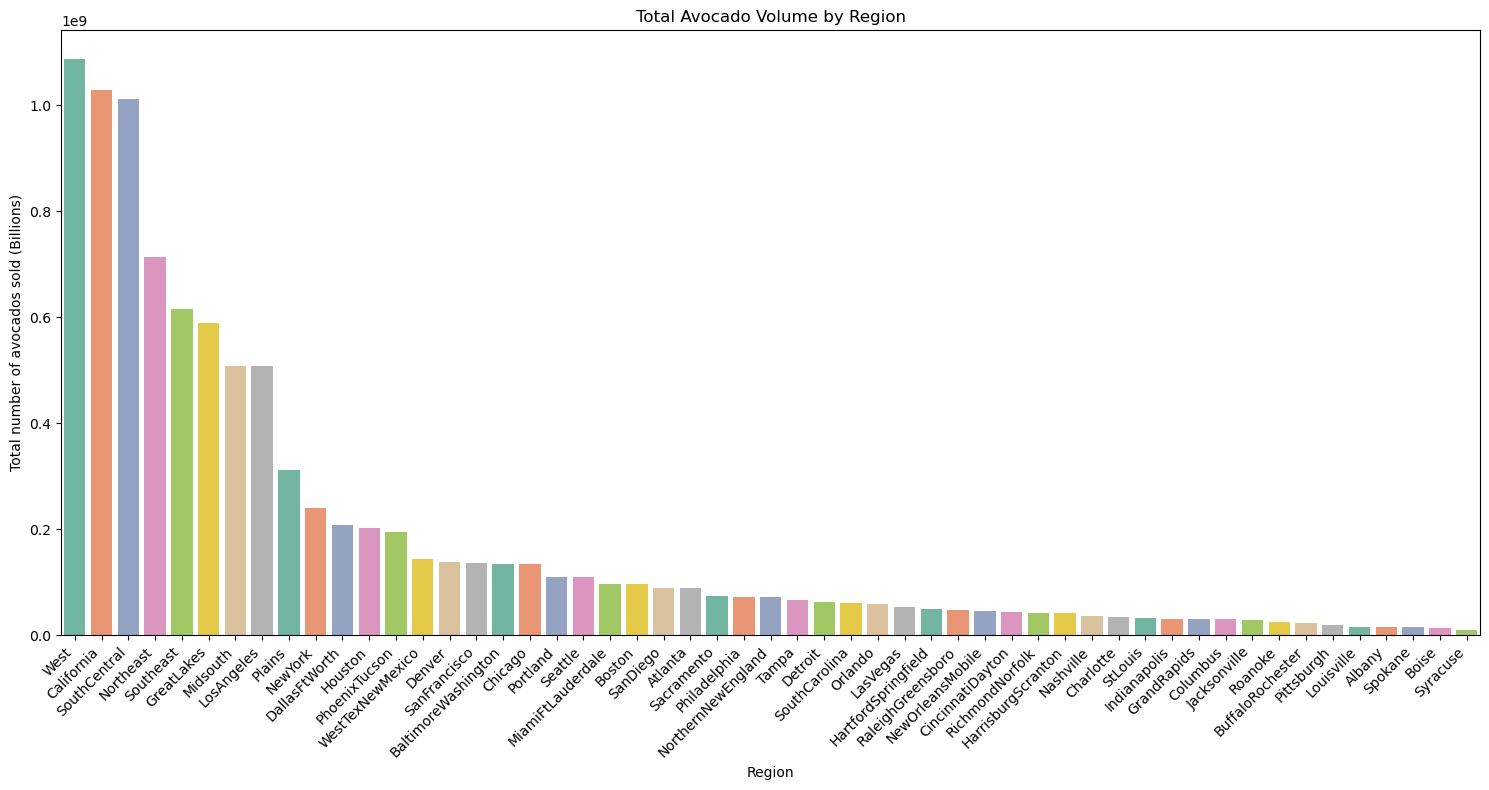

In [7]:
# Load your data
avocado_df = pd.read_csv('avocado.csv')

# Filter out 'TotalUS' region
filtered_df = avocado_df[avocado_df['region'] != 'TotalUS']

# Aggregate total volume by region
region_volume = filtered_df.groupby('region')['Total Volume'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=[15,8])
sns.barplot(x='region', y='Total Volume', data=region_volume, order=region_volume.sort_values('Total Volume', ascending=False)['region'], palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Total Avocado Volume by Region')
plt.xlabel('Region')
plt.ylabel('Total number of avocados sold (Billions)')

# Adjust layout to fit labels
plt.tight_layout()

# Save the plot to a PNG file
plt.savefig('avocado_volume_by_region.png', bbox_inches='tight')

# Show the plot
plt.show()

This bar chart visualizes the total volume of avocados sold across different regions. The regions represent a mix of individual cities, broader metropolitan areas, and larger state or multi-state regions. This setup allows for a visual comparison of avocado sales across distinct geographic categories. The West, California, and SouthCentral regions have the highest avocado sales, far surpassing other areas. This indicates that these large, avocado-producing and consuming regions drive a significant portion of overall avocado sales. Los Angeles, being part of California, also stands out as a major contributor, reflecting the high demand in the region. Major metropolitan areas such as New York, BaltimoreWashington, and PhoenixTucson also see significant sales volumes. These urban centers likely have high consumption rates due to their large populations and the popularity of avocados in modern diets. 
The clear distinction between high-volume and low-volume areas helps pinpoint where avocado demand is strongest, while also providing insight into consumption patterns across diverse regions of the country.
It's also a good idea to compare sales across different years. Let's plot the volume of avocados sold by year:

C:\Users\matroskin\AppData\Local\Temp\ipykernel_24788\2338690461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='Total Volume', data=year_volume, palette='Set1')


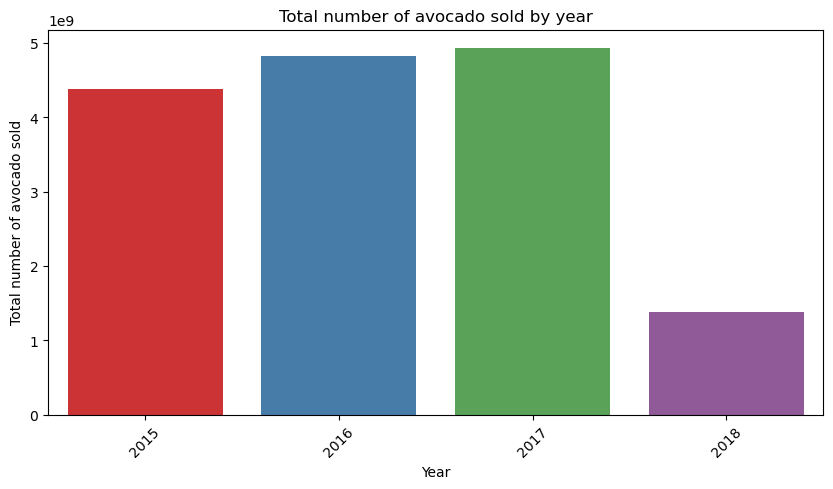

In [8]:
# Aggregate the data by year and sum the total volume
year_volume = avocado_df.groupby('year')['Total Volume'].sum().reset_index()

# Create the bar chart for total volume by year
plt.figure(figsize=[10,5])
sns.barplot(x='year', y='Total Volume', data=year_volume, palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Total number of avocado sold by year')
plt.xlabel('Year')
plt.ylabel('Total number of avocado sold')

# Save the plot to a PNG file
plt.savefig('sales_per_year.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

The distribution of avocado sales per year shows a steady increase from 2015 to 2017, reflecting a consistent upward trend in avocado consumption. The data for 2018 is incomplete, so it's difficult to draw any solid conclusions for that year.

### 5. Prepare Data for Prophet

The next code creates a new DataFrame avocado_prophet_df containing only the Date and AveragePrice columns from the original data. This filtered dataset will be used as input for forecasting avocado prices using the Prophet model.

In [9]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']] 
avocado_prophet_df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


I need to rename columns to 'y' and 'ds'. These specific column names are required by the Prophet model, where ds represents the date and y is the target variable to forecast.

In [10]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})
# Remove duplicates based on the 'ds' column
avocado_prophet_df = avocado_prophet_df.drop_duplicates(subset='ds', keep='first')

# We need to be sure that data is sorted by date
avocado_prophet_df = avocado_prophet_df.sort_values(by='ds').reset_index(drop=True)
avocado_prophet_df

,ds,y
0,2015-01-04,1.22
1,2015-01-11,1.24
2,2015-01-18,1.17
3,2015-01-25,1.06
4,2015-02-01,0.99
...,...,...
164,2018-02-25,1.28
165,2018-03-04,1.08
166,2018-03-11,1.12
167,2018-03-18,1.35


Now we need to split dataset to train and test sets. 

In [11]:
# Define cutoff date for training data
cutoff_date = '2017-01-01'

# Create training and testing datasets based on the cutoff date
train_data = avocado_prophet_df[avocado_prophet_df['ds'] < cutoff_date]
test_data = avocado_prophet_df[avocado_prophet_df['ds'] >= cutoff_date]

In [12]:
# Check for any overlap in the date ranges after cleaning
print("Train Data Range:", train_data['ds'].min(), "to", train_data['ds'].max())
print("Test Data Range:", test_data['ds'].min(), "to", test_data['ds'].max())

if train_data['ds'].max() < test_data['ds'].min():
    print("No overlap between train and test data after cleaning.")
else:
    print("Warning: There is still an overlap between train and test data!")

Train Data Range: 2015-01-04 to 2016-12-25
Test Data Range: 2017-01-01 to 2018-03-25
No overlap between train and test data after cleaning.


In [13]:
# Create a copy of the train and test sets and convert the 'ds' column to datetime
train_data = train_data.copy()
test_data = test_data.copy()

train_data['ds'] = pd.to_datetime(train_data['ds'])
test_data['ds'] = pd.to_datetime(test_data['ds'])

## 6. Initialize and Fit the Prophet Model

In this section of the code, I initialize a Prophet model and fit the model to my prepared dataset. This step allows the Prophet model to learn the underlying trends and seasonality in avocado prices over time, which will later enable us to make accurate forecasts based on this historical data.

In [14]:
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)
model.fit(train_data)

14:05:36 - cmdstanpy - INFO - Chain [1] start processing
14:05:36 - cmdstanpy - INFO - Chain [1] done processing


## 7. Forecast Future Prices

In the next steps, I will calculate the number of days in the test set, generate future dates based on that period starting from the end of the training data, and use the model to make predictions for these future dates.

In [15]:
# Calculate the number of days in the test set
test_period_days = (test_data['ds'].max() - train_data['ds'].max()).days

# Generate future dates for the test period
future = model.make_future_dataframe(periods=test_period_days, freq='D', include_history=False)
future = future[future['ds'] >= train_data['ds'].max()]  # Filter future to start from end of train data

forecast = model.predict(future)

# Display the first 5 rows of the DataFrame
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-26,1.473077,1.359928,1.673723,1.473077,1.473077,0.039533,0.039533,0.039533,0.039533,0.039533,0.039533,0.0,0.0,0.0,1.512610
1,2016-12-27,1.473792,1.368397,1.660638,1.473792,1.473792,0.045075,0.045075,0.045075,0.045075,0.045075,0.045075,0.0,0.0,0.0,1.518867
2,2016-12-28,1.474506,1.383682,1.674224,1.474506,1.474506,0.049913,0.049913,0.049913,0.049913,0.049913,0.049913,0.0,0.0,0.0,1.524419
3,2016-12-29,1.475221,1.388584,1.691939,1.475221,1.475221,0.053992,0.053992,0.053992,0.053992,0.053992,0.053992,0.0,0.0,0.0,1.529213
4,2016-12-30,1.475935,1.373799,1.682192,1.475935,1.475935,0.057275,0.057275,0.057275,0.057275,0.057275,0.057275,0.0,0.0,0.0,1.533210


Let's filter the forecast to only include dates up to the last date in the test data, convert the forecasted dates to the correct format, and then plot the forecast to visualize how the model's predictions align with the test period.

C:\Users\matroskin\anaconda3\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matroskin\anaconda3\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


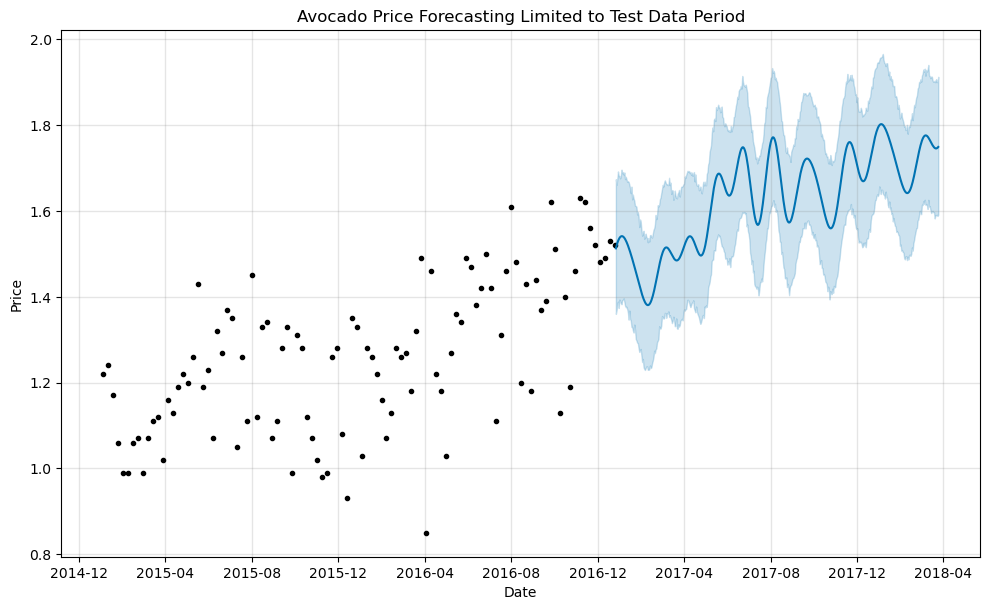

In [16]:
# Filter forecast to match only up to the last date in the test data
end_date = test_data['ds'].max()
forecast_filtered = forecast[forecast['ds'] <= end_date]

# Manually convert dates to numpy array format
forecast_filtered['ds'] = np.array(forecast_filtered['ds'])

# Plot forecast filtered by end date to match test data range
figure = model.plot(forecast_filtered, xlabel='Date', ylabel='Price')
plt.title('Avocado Price Forecasting Limited to Test Data Period')
plt.show()

In this step, I will calculate evaluation metrics to assess the accuracy of the model's predictions. Specifically, I will compute the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to quantify the differences between the actual and predicted avocado prices.

In [17]:
# Make copies to avoid SettingWithCopyWarning
forecast_filtered_copy = forecast_filtered.copy()
test_data = test_data.copy()

# Ensure both 'ds' columns are of datetime type
forecast_filtered_copy['ds'] = pd.to_datetime(forecast_filtered_copy['ds'])
test_data['ds'] = pd.to_datetime(test_data['ds'])


In [18]:
# Merge forecasted data with the test data for evaluation
forecasted = forecast_filtered_copy[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(test_data, on='ds', how='left')

# Drop any rows with NaN values that resulted from the merge
forecasted = forecasted.dropna(subset=['y', 'yhat'])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Evaluation Metrics
mae = mean_absolute_error(forecasted['y'], forecasted['yhat'])
mse = mean_squared_error(forecasted['y'], forecasted['yhat'])
rmse = mse ** 0.5

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.19336396800883993
Mean Squared Error (MSE): 0.06546139387201826
Root Mean Squared Error (RMSE): 0.25585424341217844


The MAE and RMSE are relatively low, suggesting that the model's predictions are fairly close to actual values.
However, since RMSE is higher than MAE, it suggests that there are some larger prediction errors that skew the results.
Probably what could help: refining seasonality, changepoints, or adding more data to better capture patterns.
In summary, the model performs decently but could benefit from fine-tuning to better handle larger fluctuations in avocado prices.

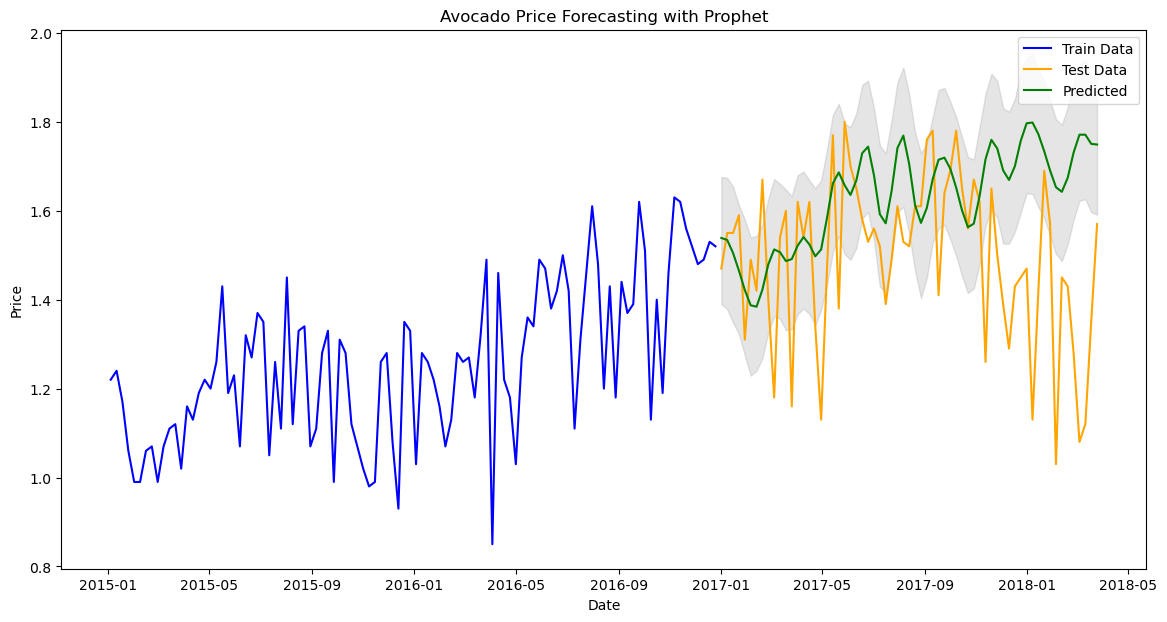

In [20]:
# Ensure all 'ds' columns are of datetime type explicitly
train_data['ds'] = pd.to_datetime(train_data['ds'])
test_data['ds'] = pd.to_datetime(test_data['ds'])
forecasted['ds'] = pd.to_datetime(forecasted['ds'])

# Now plot again after ensuring datetime consistency
plt.figure(figsize=(14, 7))
plt.plot(train_data['ds'], train_data['y'], label='Train Data', color='blue')
plt.plot(test_data['ds'], test_data['y'], label='Test Data', color='orange')
plt.plot(forecasted['ds'], forecasted['yhat'], label='Predicted', color='green')
plt.fill_between(forecasted['ds'], forecasted['yhat_lower'], forecasted['yhat_upper'], color='gray', alpha=0.2)
plt.title('Avocado Price Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In the next part of the code, I create a new plot, which separates the forecast into its main components: the overall trend, seasonal patterns, and any special effects such as holidays. By examining these components, we can better understand the factors influencing the avocado price predictions, including how trends and seasonal variations contribute to the forecasted values.

C:\Users\matroskin\anaconda3\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\matroskin\anaconda3\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\matroskin\anaconda3\anaconda3\envs\prophet\Lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing py

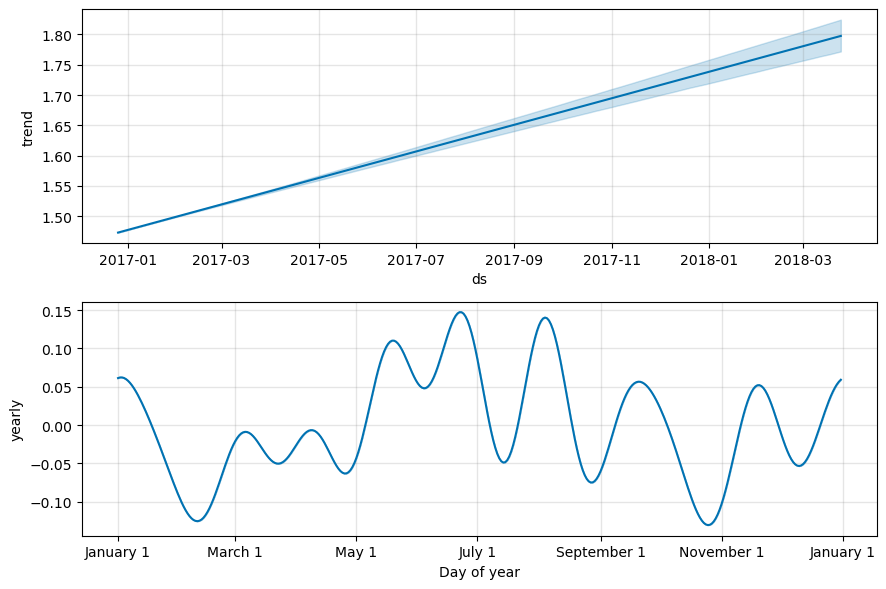

In [22]:
figure3 = model.plot_components(forecast_filtered)

What do these plots show:
Trend Component: This plot shows the overall direction of avocado prices over time. It highlights the long-term trends, indicating whether prices are generally increasing or decreasing.

Yearly Seasonality Component: This plot illustrates the recurring seasonal patterns within a year. It reveals how avocado prices tend to fluctuate at different times of the year, capturing annual trends such as peaks and troughs related to specific months or seasons.

The components plot reveals that avocado prices exhibit a clear upward trend over time, indicating a general increase in prices. Additionally, the yearly seasonality plot shows regular annual fluctuations, with specific months experiencing predictable peaks and troughs, highlighting the seasonal nature of avocado pricing.

## Conclusion

This project involved forecasting avocado prices using Facebook's Prophet model to understand price trends and predict future prices. By leveraging historical data, I analyzed patterns and seasonal effects, leading to the generation of forecasts for the next year. The findings indicated clear seasonal trends in avocado prices, with peaks and troughs aligning with expected seasonal patterns. The forecast plots revealed that avocado prices are likely to follow a similar trajectory in the future, with peaks in autumn and troughs in January.

This analysis demonstrates the utility of Prophet in time series forecasting, providing valuable insights for stakeholders in the avocado supply chain. By understanding these trends, retailers and other stakeholders can make more informed decisions regarding inventory and pricing strategies.

Overall, working with Prophet to forecast avocado prices has been for me a valuable experience in applying time series analysis techniques to real-world data, offering practical benefits and deepening the understanding of seasonal trends in commodity pricing.